In [ ]:
import numpy as np
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.set(color_codes=True)

# Dealing with Missing Data

##Numpy

In [ ]:
x = np.array([1,2,3,np.nan,5])

In [ ]:
np.isnan(x)

array([False, False, False,  True, False])

In [ ]:
x_ = np.array([1,2,3,None,5])

In [ ]:
x_[~np.isnan(x)]

array([1, 2, 3, 5], dtype=object)

In [ ]:
x_[~np.isnan(x)].sum()

11

In [ ]:
b = np.ma.masked_array(x_, mask = np.isnan(x))

In [ ]:
b.mean()

2.75

##Pandas

In [ ]:
rooms = pd.read_csv('rooms.csv')

In [ ]:
rooms

,Room_Number,Num_Students,Department,Occupied
0,101.0,1,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3,Electrical,Y
3,104.0,2,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1,Electrical,Y
6,107.0,3,Civil,--
7,108.0,NaN,CS,Y
8,109.0,na,Mechanical,NaN
9,110.0,2,CS,N


In [ ]:
rooms = pd.read_csv('rooms.csv', na_values=['na','NA','n/a','Empty','','--'])

In [ ]:
rooms

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,NaN
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,NaN
9,110.0,2.0,CS,N


In [ ]:
rooms.dtypes

Room_Number     float64
Num_Students    float64
Department       object
Occupied         object
dtype: object

In [ ]:
rooms.isnull().sum()

Room_Number     1
Num_Students    4
Department      1
Occupied        0
dtype: int64

In [ ]:
rooms.Occupied.fillna('N',inplace=True)

In [ ]:
rooms.Occupied = (rooms.Occupied=='Y')

In [ ]:
rooms

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,2.0,Mechanical,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,2.0,Chemical,False
5,106.0,1.0,Electrical,True
6,107.0,3.0,Civil,False
7,108.0,2.0,CS,True
8,109.0,2.0,Mechanical,False
9,110.0,2.0,CS,False


In [ ]:
rooms.Num_Students.fillna(rooms.Num_Students.median(), inplace=True)

In [ ]:
rooms.Department.fillna(method='pad', inplace=True)

In [ ]:
rooms.Room_Number.interpolate(inplace=True)

# Open Ended Descriptive Stats

In [ ]:
df = pd.read_excel('ameo2015.xlsx')

In [ ]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [ ]:
df[['Salary','Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [ ]:
df[['Gender','10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,,,,,,,,
f,80.932894,77.007618,74.048056,501.911181,499.889237,492.356322,0.519922,0.121034,0.292444,0.012173,-0.179358,0.038246
m,76.979000,73.666636,70.679947,501.566590,502.136797,519.993752,0.507521,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [ ]:
df[['Gender','10percentage','12percentage','collegeGPA','English','Logical','Quant','Domain','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,,,,,,,,
f,82.4,77.0,74.00,500,500,494,0.622643,0.2718,0.3789,0.0914,-0.23440,0.0973
m,78.0,73.4,70.66,500,505,525,0.622643,-0.0154,0.2124,0.0914,-0.17277,-0.0943


In [ ]:
df['High Salary'] = (df.Salary > (df.Salary.mean()+df.Salary.std()))

In [ ]:
df[['Salary', 'Gender','High Salary']].groupby(['High Salary','Gender']).mean()

Salary
High Salary Gender               
False       f       271499.454744
            m       272598.433606
True        f       832250.000000
            m       785344.827586

In [ ]:
df[['Salary', 'Gender','High Salary']].groupby(['High Salary','Gender']).median()

Salary
High Salary Gender        
False       f       300000
            m       290000
True        f       652500
            m       620000

In [ ]:
df[['Salary', 'Gender','High Salary']].groupby(['High Salary','Gender']).count()

Salary
High Salary Gender        
False       f          917
            m         2809
True        f           40
            m          232

In [ ]:
print('Percentage of Female in Low Income: ',917/(917+40)*100)

Percentage of Female in Low Income:  95.82027168234065


In [ ]:
print('Percentage of Male in Low Income: ',2809/(2809+232)*100)

Percentage of Male in Low Income:  92.3709306149293


# Agriculture

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Datasets/apy.csv',na_values='=')

In [ ]:
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [ ]:
df.sort_values('Crop_Year',inplace=True, ignore_index=True)

In [ ]:
df.shape

(246091, 7)

In [ ]:
df.dropna(subset=['Production'],inplace=True)

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Madhya Pradesh,HOSHANGABAD,1997,Rabi,Linseed,6500.0,2400.0
1,Assam,GOALPARA,1997,Kharif,Arhar/Tur,380.0,322.0
2,Uttar Pradesh,ALLAHABAD,1997,Kharif,Total foodgrain,445964.0,809704.0
3,Uttar Pradesh,ALLAHABAD,1997,Kharif,Maize,299.0,633.0
4,Uttar Pradesh,ALLAHABAD,1997,Kharif,Soyabean,25.0,26.0


In [ ]:
df.shape

(242364, 7)

In [ ]:
df.Crop_Year.unique()

array([2002, 2003, 2010, 2004, 2001, 2005, 2000, 2006, 2013, 1999, 2014,
       1997, 2012, 2007, 2011, 1998, 2009, 2008, 2015])

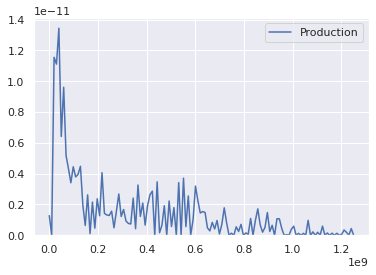

In [ ]:
sns.kdeplot(df.Production)

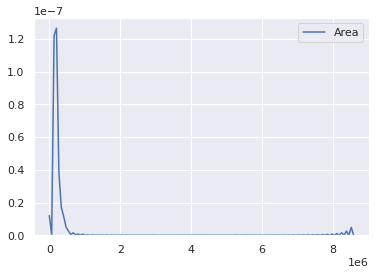

In [ ]:
sns.kdeplot(df.Area)

In [ ]:
agg = df.groupby(['State_Name','Crop_Year']).sum()
agg.reset_index(inplace=True)
agg.sort_values('Crop_Year', inplace=True, ignore_index=True)

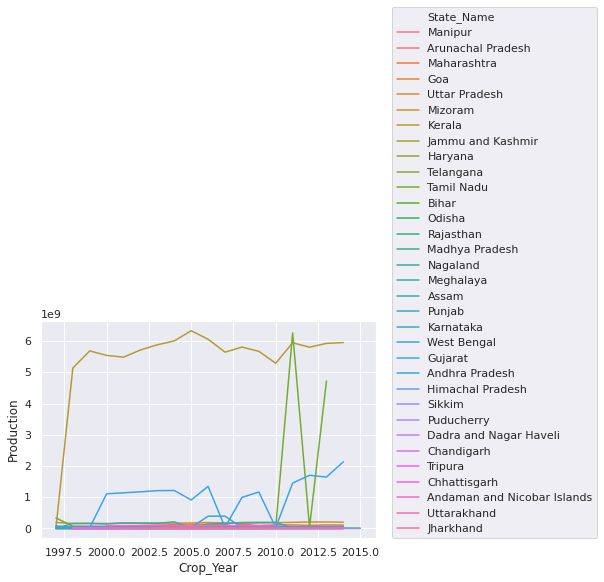

In [ ]:
sns.lineplot(x='Crop_Year', y='Production',data=agg, hue='State_Name' )
plt.legend(loc=[1.05,0])

In [ ]:
agg.dtypes

State_Name     object
Crop_Year       int64
Area          float64
Production    float64
dtype: object

In [ ]:
pip install plotly_express

In [ ]:
import plotly_express as px

In [ ]:
px.scatter(agg,x='Area', y='Production', color='State_Name', animation_frame='Crop_Year', animation_group='State_Name')

In [ ]:
sel = df[df.Crop.isin(['Rice','Wheat','Maze','Ragi'])].groupby(['State_Name','Crop_Year']).sum()
sel.reset_index(inplace=True)
sel.sort_values('Crop_Year', inplace=True, ignore_index=True)

In [ ]:
px.scatter(sel, x='Area', y='Production', color='State_Name', animation_frame='Crop_Year', animation_group='State_Name')

In [ ]:
sel['Productivity'] = sel.Production/sel.Area

In [ ]:
px.scatter(sel, x='Area', y='Productivity', color='State_Name', animation_frame='Crop_Year', animation_group='State_Name',size='Production')

In [ ]:
px.scatter(sel, x='Area', y='Productivity', color='State_Name', animation_frame='Crop_Year', animation_group='State_Name',size='Production',
           range_y=[0,5], range_x=[-1E6,24E6])

#Quiz

In [ ]:
import math

In [ ]:
# states and UTs ques
print(28*27*4 + math.factorial(28)*4*7/(math.factorial(24)*24) + math.factorial(28)*8*7/(720*math.factorial(22))
+ math.factorial(28)*70/(math.factorial(8)*math.factorial(20)))

239241114.0


In [ ]:
# chessboard rectangles
print(9*8/2 * 9*8/2)

1296.0


In [ ]:
# interview dress
print(6*4*3*2)

144


In [ ]:
# icecream
print(math.factorial(12)/(math.factorial(6)**2))

924.0


In [ ]:
print(10**4 - 9**4)

3439


In [ ]:
print(math.factorial(14)/(math.factorial(5)*math.factorial(9)) - math.factorial(10)/(math.factorial(5)*math.factorial(5)))

1750.0


In [ ]:
print(4*math.factorial(14)/(math.factorial(4)*math.factorial(10)))

4004.0


# week 16 quiz

In [1]:
print( 0.94**20 + 20*0.06*0.94**19 + 190*0.0036*0.94**18)

0.8850275957378538


In [2]:
print(0.99**100 - 0.99**3)

-0.6042666587267709
